In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
mirna_sequence_records_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mirna_sequence_records.csv"

data_df = pd.read_csv(mirna_sequence_records_path, dtype={"source_db_version": str, "taxon_id": str})

In [3]:
def set_plot_styles():

    styles = {
        # remove the top and right spines from the plots
        'axes.spines.right': False,
        'axes.spines.top': False,
        
        # color palette configuration
        'image.lut': 256,
        'axes.prop_cycle': mpl.cycler('color', ['#AF3029','#5E409D', '#BC5215', '#AD8301', '#66800B', '#24837B', '#205EA6' , '#A02F6F']),
        
        # retina figures configuration
        'figure.dpi': 300,
        'savefig.dpi': 300,
    }
    
    mpl.rcParams.update(styles)

In [ ]:
# Calculate counts of miRNAs per database and overall
counts_per_db = data_df.groupby('source_db')['miRNA_id'].value_counts()
counts_all_db = data_df['miRNA_id'].value_counts()
counts_dict = counts_per_db.groupby("source_db").apply(list).to_dict()
counts_dict["All Databases"] = list(counts_all_db)

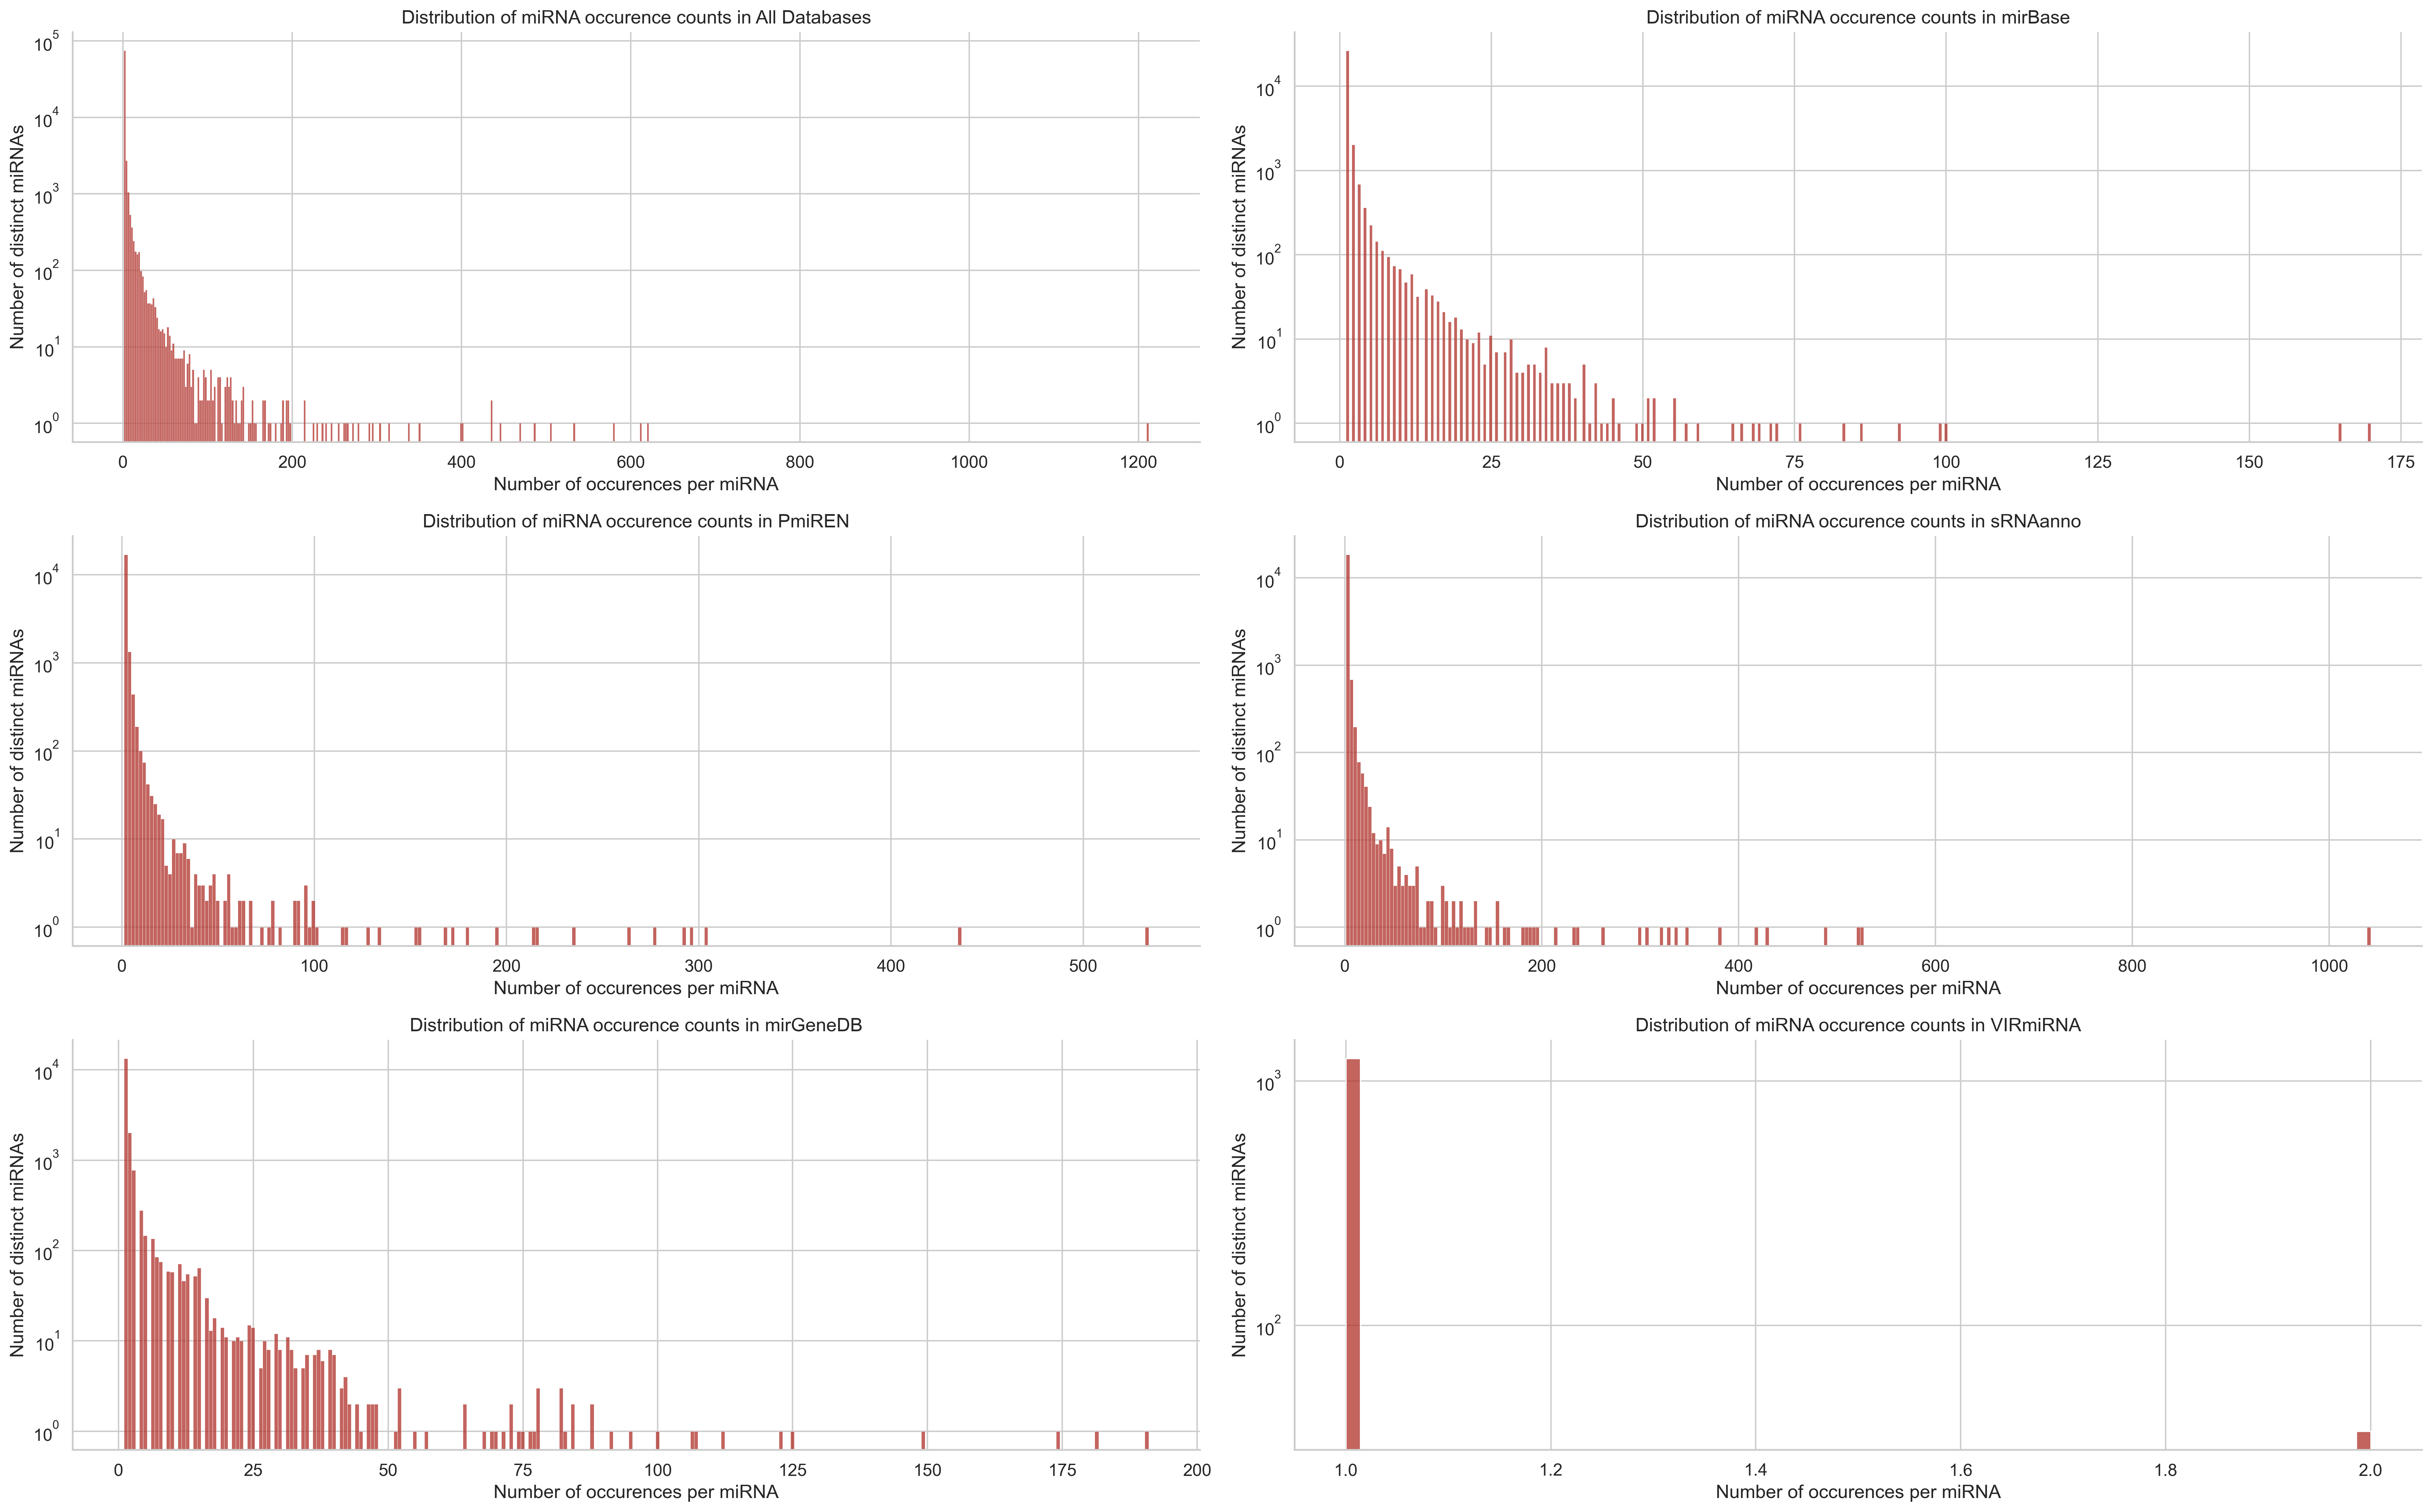

In [ ]:
# Plotting

set_plot_styles()
n_dbs = len(counts_dict)
nrows = (n_dbs + 1) // 2  # Two plots per row
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(12 * ncols, 5 * nrows))
axes = axes.flatten()

dbs = ["All Databases", "mirBase", "PmiREN", "sRNAanno", "mirGeneDB", "VIRmiRNA"]
for ax, db in zip (axes, dbs):
    sns.histplot(counts_dict[db], ax=ax)
    ax.set_title("Distribution of miRNA occurence counts in " + db)
    ax.set_xlabel("Number of occurences per miRNA")
    ax.set_ylabel("Number of distinct miRNAs")
    ax.set_yscale('log')

plt.tight_layout()
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/shared_miRNAs_per_db.png")
plt.show()
